In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./weatherconditions.csv')
data.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
2,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,0.83,14.1036,15.8263,1016.41
4,8.755556,0.83,11.0446,15.8263,1016.51


In [3]:
#Dropping model column
data2=data.drop('Temperature (C)',axis=1)

#Show Key Statistics
data2.describe()

,Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.734899,10.810640,10.347325,1003.235956
std,0.195473,6.913571,4.192123,116.969906
min,0.000000,0.000000,0.000000,0.000000
25%,0.600000,5.828200,8.339800,1011.900000
50%,0.780000,9.965900,10.046400,1016.450000
75%,0.890000,14.135800,14.812000,1021.090000
max,1.000000,63.852600,16.100000,1046.380000


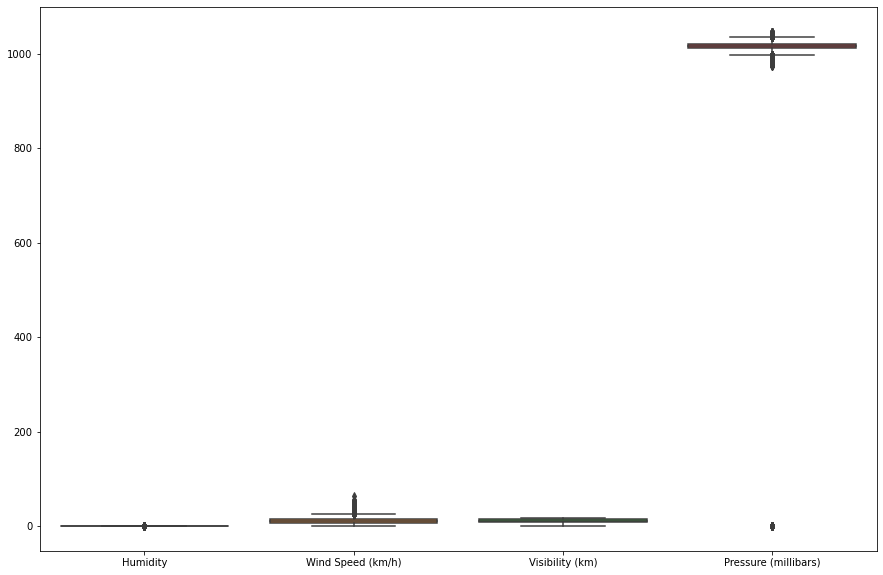

In [4]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=data2)

In [5]:
#Define x and y variable
x = data2.drop('Humidity',axis=1).to_numpy()
y = data2['Humidity'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

In [6]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data2.drop('Humidity',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 0.74


                      Coefficients
Wind Speed (km/h)        -0.037128
Visibility (km)          -0.068940
Pressure (millibars)      0.003518

R2: 0.16
Mean Absolute Error: 0.14
Mean Squared Error: 0.03
Root Mean Squared Error: 0.18


In [ ]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()